0.6191860465116279
              precision    recall  f1-score   support

           1       0.77      0.79      0.78      1292
           2       0.52      0.58      0.55      1283
           3       0.51      0.53      0.52      1292
           4       0.77      0.64      0.70      1293

    accuracy                           0.63      5160
   macro avg       0.64      0.63      0.64      5160
weighted avg       0.64      0.63      0.64      5160



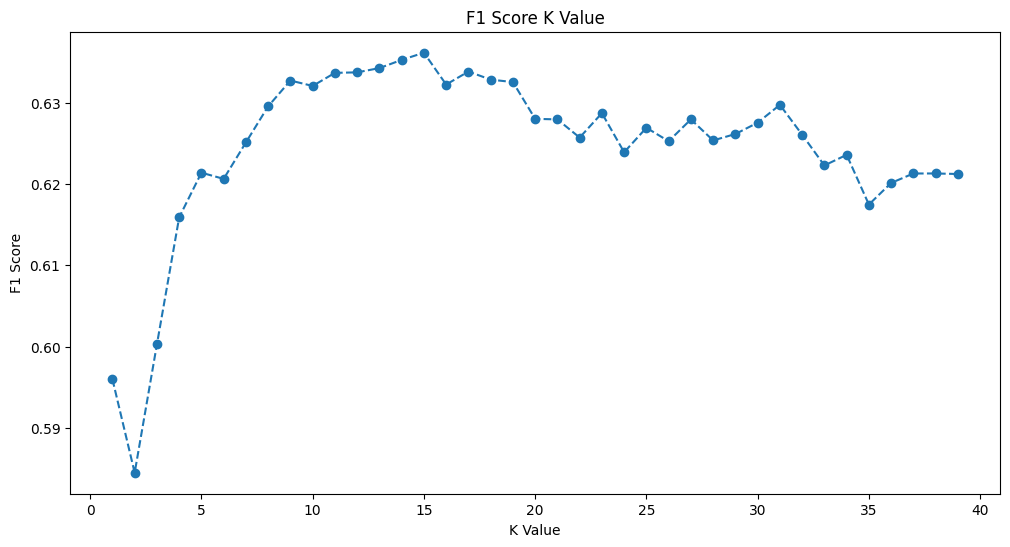

In [1]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
import pandas as pd
df.head()
#Preprocessing data
df["MedHouseValCat"] = pd.qcut(df["MedHouseVal"], 4, retbins=False, labels=[1, 2, 3, 4])
y = df['MedHouseValCat']
X = df.drop(['MedHouseVal', 'MedHouseValCat'], axis = 1)
#Split data to train and test sets
from sklearn.model_selection import train_test_split
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)
#Feature scaling for classification
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#Training and predicting data
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
#Evaluating KNN
acc = classifier.score(X_test, y_test)
print(acc)
#Finding best K for KNN and plotting
from sklearn.metrics import f1_score
f1s = []
for i in range(1, 40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train, y_train)
 pred_i = knn.predict(X_test)
 f1s.append(f1_score(y_test, pred_i, average='weighted'))
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1s,linestyle='dashed', marker='o')
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
#Classification report
from sklearn.metrics import classification_report
classifier15 = KNeighborsClassifier(n_neighbors=15)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))